# Homework 04

## Instructions

* **Please upload this jupyter notebook as your homework submission**
* Please read carefully the description of each question below
* You will need to fill in your code block within the following structure

    ```python
    #### START YOUR CODE HERE ####

    ####  END YOUR CODE HERE  ####
    ```
* For code placeholders like below, you need to replace None with your own code

    ```python
    #### START YOUR CODE HERE ####
    A = None
    ####  END YOUR CODE HERE  ####
    ```
* You may noticed that there are annotations on coding steps, such as step 1, step 2, etc. Those are basically hints and suggestions to help you construct you coding logic, you don't necessarily follow those suggested coding patterns if you have your own way of coding. However, you do need to follow the required input (function name, function parameter list, etc.) and output (return values, output format, etc.) formats.

In [1]:
# import core libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

This time we are going to use the datasets about restaurant tips (**`tips.csv`, located in the same folder as this current jupyter notebook file**) to practice our skills on data visualization and descriptive statistics.

Description on the fields of the csv:
* `total_bill`: total cost of the meal, including tax, in US dollars
* `tip`:  tip in US dollars
* `sex`: gender of the person paying the meal
* `smoker`: are there smokers in the party? (Yes/No)
* `day`: weekday of the party
* `time`: time of the party
* `size`: number of people in the party

**Q1**. Create a function `tiprate_by_time()` that takes a pandas dataframe `df` of the tips information and output the average tip rate by time. Then, call the function `tiprate_by_time()` to calculate the average tip rate by time based on the provided data `tips.csv`.  (**5 points**)
* tip rate is defined as $\frac{tip}{total\_bill}$

In [2]:
def tiprate_by_time(df):
    '''
    parameter: df
    datatype: pandas dataframe
    comment: contains tip information, same format as the given tips.csv file
    
    return
        parameter: df_stats
        datatype: pandas dataframe
        comment: 1st column is the time value, 2nd column is the average tip rate for the corresponding time
    '''
    #### START YOUR CODE HERE ####
    # step 1: append a new column tip_rate to df, populate it with the tip rate of each transaction
    df['tip_rate'] = df['tip']/df['total_bill']
    
    # step 2: calculate the average tip rate by time, assign the result to dataframe df_stats
    df_stats = df.groupby(['time']).agg({'tip_rate':np.mean}).reset_index()
    ####  END YOUR CODE HERE  ####
    
    # step 3: return df_stats
    return df_stats

In [3]:
# test the function
#### START YOUR CODE HERE ####
## read the tips.csv into dataframe tips
tips = pd.read_csv('tips.csv')
## call the function tiprate_by_time and output the result
result = tiprate_by_time(tips)
## show the result
result
####  END YOUR CODE HERE  ####

,time,tip_rate
0,Dinner,0.159518
1,Lunch,0.164128


Your result should be something like this:

|   | time   | tip_rate |
|---|--------|----------|
| 0 | Dinner | 0.159518 |
| 1 | Lunch  | 0.164128 |


**Q2**. Visualize the tip rate distribution (**5 points**)
* After the operations in **Q1**, you may noticed that the dataframe `tips` has got the new column `tip_rate` appended. (You don't need to answer it here, but do you understand why?)

* Part I: plot the histogram of tip rate by sex side by side, the vertical axis should represent the frequency

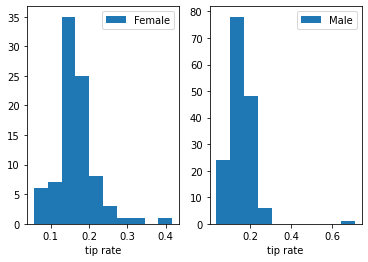

In [4]:
#### START YOUR CODE HERE ####
fig,axes = plt.subplots(1,2)

axes[0].hist(tips.loc[tips["sex"]=='Female',"tip_rate"],label='Female')
axes[1].hist(tips.loc[tips["sex"]=='Male',"tip_rate"],label='Male')
axes[1].legend()
axes[0].legend()
axes[0].set_xlabel('tip rate')
axes[1].set_xlabel('tip rate')
plt.show()
####  END YOUR CODE HERE  ####

Your output should be something like this

![](tip_rate_hist_p1.png)

* Part II: plot the histogram of tip rate by sex side by side, the vertical axis should represent the probability density

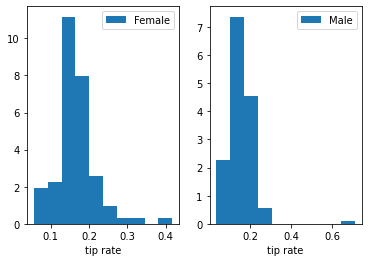

In [5]:
#### START YOUR CODE HERE ####
fig,axes = plt.subplots(1,2)

axes[0].hist(tips.loc[tips["sex"]=='Female',"tip_rate"],label='Female', density=True)
axes[1].hist(tips.loc[tips["sex"]=='Male',"tip_rate"],label='Male', density=True)
axes[1].legend()
axes[0].legend()
axes[0].set_xlabel('tip rate')
axes[1].set_xlabel('tip rate')
plt.show()

####  END YOUR CODE HERE  ####

Your output should be something like this

![](tip_rate_hist_p2.png)

**Q3**. Generate a pairplot of the dataframe `tips` with the library `seaborn` (**5 points**)

* Part I: check the pairwise correlation with `seaborn`'s `pairplot`

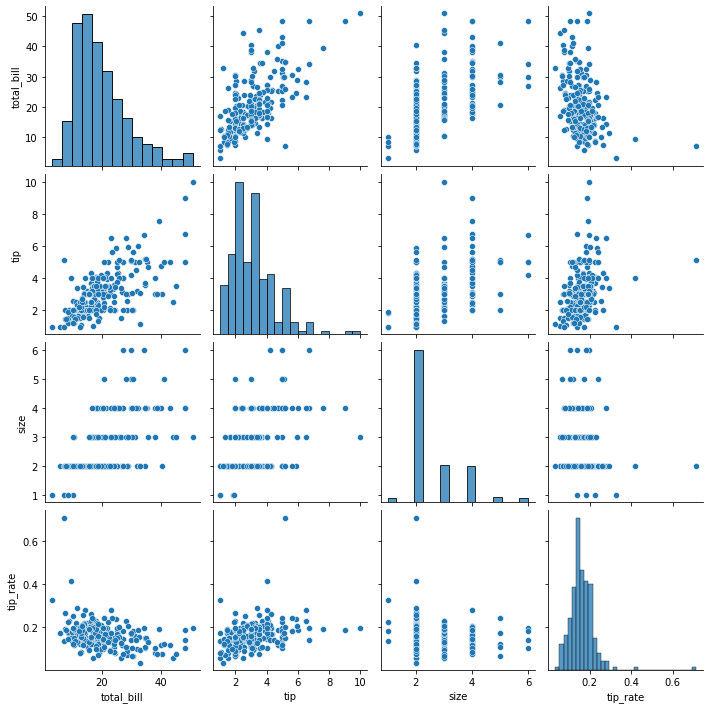

In [6]:
#### START YOUR CODE HERE ####
sns.pairplot(tips)

####  END YOUR CODE HERE  ####

Your output should be something like this

![](pairplot_p1.png)

* Part II: check the pairwise correlations with `seaborn`'s `pairplot`, this time overlay the distribution from different time of a day

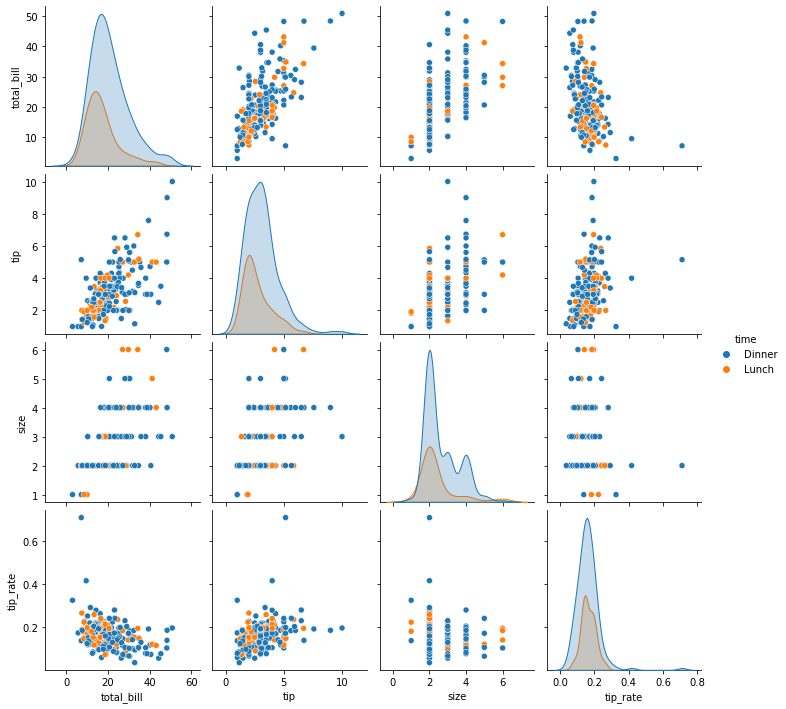

In [7]:
#### START YOUR CODE HERE ####
sns.pairplot(tips, hue='time')

####  END YOUR CODE HERE  ####

Your output should be something like this

![](pairplot_p2.png)

**Q4**. Quantitative analysis on the pairwise correlations in the dataframe `tips` (**5 points**)

* Part I: find out all the pairwise correlation values

In [8]:
#### START YOUR CODE HERE ####
df_corr = tips.corr()
df_corr
####  END YOUR CODE HERE  ####

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


Your output should be something like this:

|            | total_bill |      tip |      size | tip_rate  |
|-----------:|-----------:|---------:|----------:|-----------|
| total_bill |   1.000000 | 0.675734 |  0.598315 | -0.338624 |
|        tip |   0.675734 | 1.000000 |  0.489299 |  0.342370 |
|       size |   0.598315 | 0.489299 |  1.000000 | -0.142860 |
|   tip_rate |  -0.338624 | 0.342370 | -0.142860 |  1.000000 |
|            |            |          |           |           |    

* Part II: visualize the correlations with a heatmap

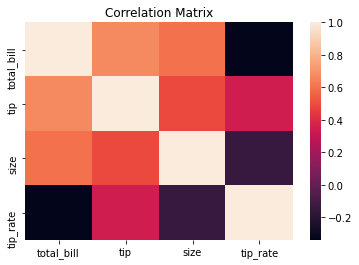

In [9]:
#### START YOUR CODE HERE ####
sns.heatmap(df_corr)
plt.title('Correlation Matrix')
plt.show()

####  END YOUR CODE HERE  ####

Your output should be something similar to 

![](heatmap_p1.png)

* Part III: Create a mask to cover the upper right half of the correlation matrix

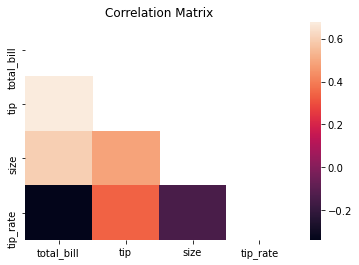

In [10]:
#### START YOUR CODE HERE ####
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
mask

sns.heatmap(df_corr, mask=mask)
plt.title('Correlation Matrix')
plt.show()
####  END YOUR CODE HERE  ####

Your output should be something similar to 

![](heatmap_p2.png)

In [17]:
d={'a':[1,2,2,4],'b':[5,6,7,8],'c':[9,10,11,12]}

In [18]:
df=pd.DataFrame(data=d)

In [22]:
df.a.unique()

array([1, 2, 4], dtype=int64)

In [23]:
set(df.a)

{1, 2, 4}

In [29]:
df.loc[0:2,]

,a,b,c
0,1,5,9
1,2,6,10
2,2,7,11
